**Imported all the necessary librairies**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Read csv file

In [58]:
df=pd.read_csv("/content/Significant_Earthquakes (1).csv")
df.head()

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,NaN,7.86,mw,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,NaN,5.00,fa,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,3,1901-12-30T22:34:00.000Z,52.00,-160.00,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,4,1902-01-01T05:20:30.000Z,52.38,-167.45,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


Descriptive Statistics

In [59]:
df.describe()

,Unnamed: 0,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,106085.000000,106085.000000,106085.000000,105800.000000,106085.000000,35455.000000,45748.000000,25804.000000,77340.000000,24424.000000,56372.000000,39041.000000,46071.000000
mean,53042.000000,3.290472,40.319804,62.114503,5.445059,146.148357,64.102598,4.281664,0.952670,7.768765,7.581037,0.158126,56.750038
std,30624.245991,30.059234,121.976446,108.531122,0.480688,121.184266,38.765626,5.264794,0.369821,4.108223,10.415180,0.149728,83.161053
min,0.000000,-77.080000,-179.997000,-4.000000,5.000000,0.000000,6.500000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,26521.000000,-17.900000,-72.301000,10.400000,5.100000,63.000000,36.500000,1.280000,0.800000,6.100000,1.900000,0.057000,13.000000
50%,53042.000000,-1.150000,99.403000,33.000000,5.300000,107.000000,56.000000,2.594000,0.950000,7.600000,4.800000,0.086000,28.000000
75%,79563.000000,28.850000,142.634000,51.500000,5.670000,190.000000,81.700000,5.086000,1.100000,9.300000,8.800000,0.200000,63.000000
max,106084.000000,87.386000,180.000000,700.000000,9.500000,929.000000,360.000000,50.901000,69.320000,99.000000,1091.900000,1.840000,954.000000


In [60]:
df.describe(include='object')

,time,magType,net,id,updated,place,type,status,locationSource,magSource
count,106085,106085,106085,106085,106085,105194,106085,106085,106085,106085
unique,102094,26,21,99585,98845,61561,6,2,88,91
top,2023-03-19T15:06:27.280Z,mb,us,us6000k0xf,2018-06-04T20:43:44.000Z,South Sandwich Islands region,earthquake,reviewed,us,us
freq,7,42781,89361,8,318,2438,105595,105981,88120,63629


Display Rows and Columns

In [61]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])
df.shape

Number of rows: 106085
Number of columns: 23


(106085, 23)

*Info* about dataset

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106085 entries, 0 to 106084
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       106085 non-null  int64  
 1   time             106085 non-null  object 
 2   latitude         106085 non-null  float64
 3   longitude        106085 non-null  float64
 4   depth            105800 non-null  float64
 5   mag              106085 non-null  float64
 6   magType          106085 non-null  object 
 7   nst              35455 non-null   float64
 8   gap              45748 non-null   float64
 9   dmin             25804 non-null   float64
 10  rms              77340 non-null   float64
 11  net              106085 non-null  object 
 12  id               106085 non-null  object 
 13  updated          106085 non-null  object 
 14  place            105194 non-null  object 
 15  type             106085 non-null  object 
 16  horizontalError  24424 non-null   floa

In [63]:
df.columns

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [64]:
df.dtypes

,0
Unnamed: 0,int64
time,object
latitude,float64
longitude,float64
depth,float64
mag,float64
magType,object
nst,float64
gap,float64
dmin,float64


droping irrrelevant column


In [65]:
df.drop(columns=['Unnamed: 0','id','updated','status'], axis=1, inplace=True)

# **Handling Missing Values**

In [66]:
df.isnull().sum() / len(df) * 100

,0
time,0.000000
latitude,0.000000
longitude,0.000000
depth,0.268652
mag,0.000000
magType,0.000000
nst,66.578687
gap,56.876090
dmin,75.676109
rms,27.096196


 Bar Graph – Missing Values per Column

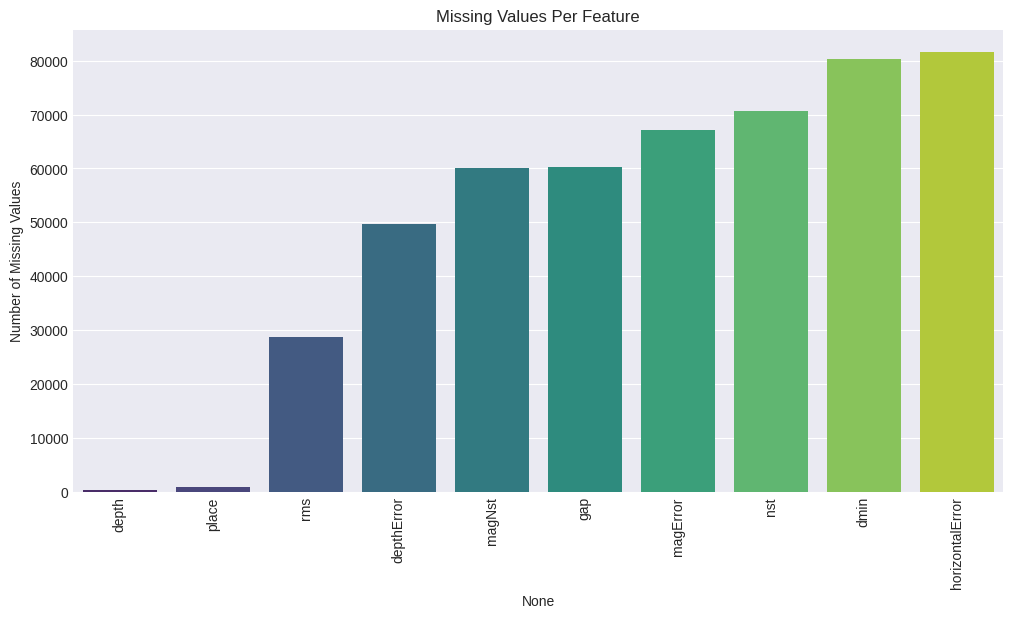

In [67]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot missing values as a heatmap
plt.figure(figsize=(12, 6))
missing_values = missing_values.sort_values(ascending=True)
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette="viridis", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Feature")
plt.show()

Histograms – Distribution of Numerical Columns

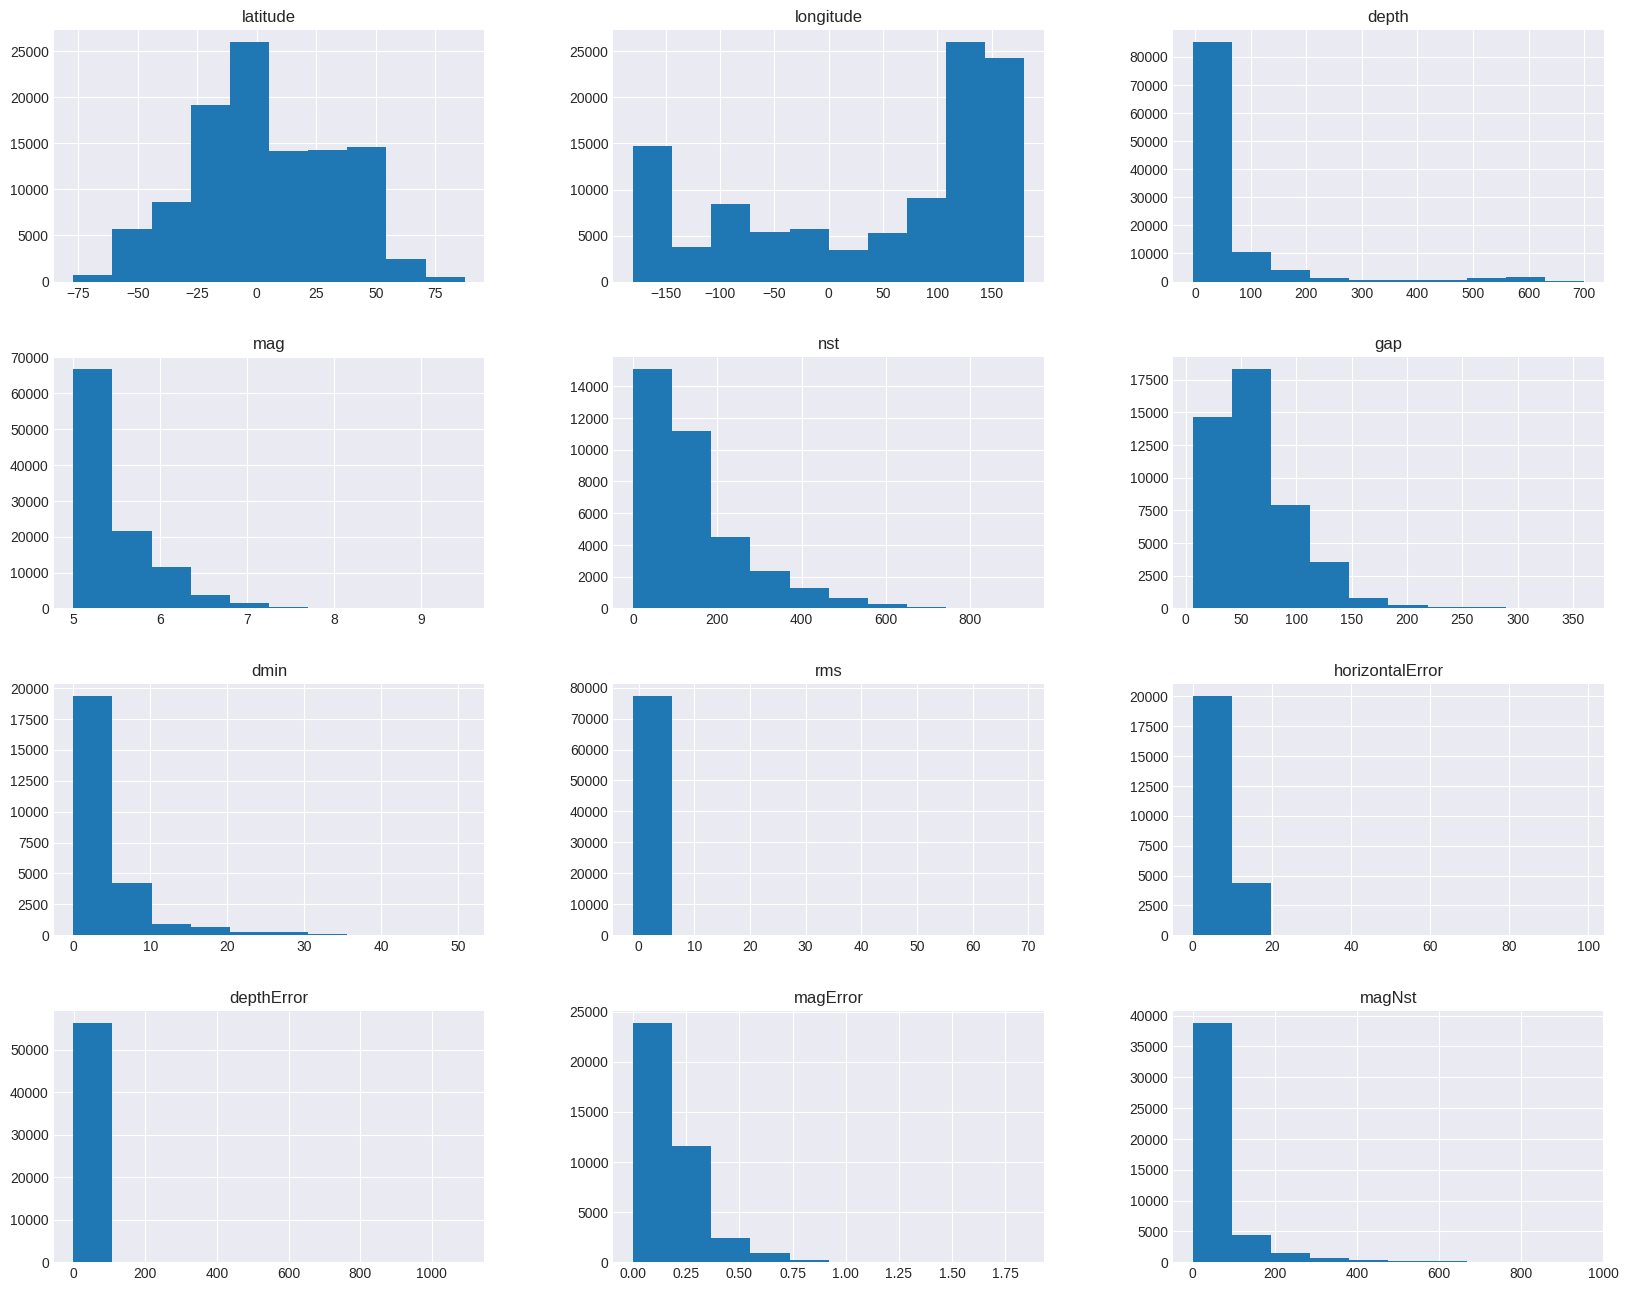

In [68]:
df.hist(figsize=[20,16])
plt.show()

In [69]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

Check skewness

In [70]:
# Check skewness
# If skewness is greater than ±0.5, the feature is skewed,median is a better choice

df[num_cols].skew()

,0
latitude,0.037534
longitude,-0.639836
depth,3.709168
mag,1.703082
nst,1.737736
gap,1.832730
dmin,3.031571
rms,100.238542
horizontalError,13.221505
depthError,36.190956



Missing values were handled using the median imputation method for numerical columns and mode imputation for categorical columns

In [71]:
#missing value handling
df["depth"]=df["depth"].fillna(df["depth"].median())
df["rms"]=df["rms"].fillna(df["rms"].mean())
df["place"]=df["place"].fillna(df["place"].mode()[0])
df["depthError"]=df["depthError"].fillna(df["depthError"].mean())
df["magNst"]=df["magNst"].fillna(df["magNst"].median())
df["gap"]=df["gap"].fillna(df["gap"].median())
df["nst"]=df["nst"].fillna(df["nst"].median())
df["dmin"]=df["dmin"].fillna(df["dmin"].median())
df["horizontalError"]=df["horizontalError"].fillna(df["horizontalError"].median())
df["magError"]=df["magError"].fillna(df["magError"].median())

In [72]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,0
dmin,0
rms,0


# **Outliers**


 Box Plot – Identification of Outliers in Numerical Features

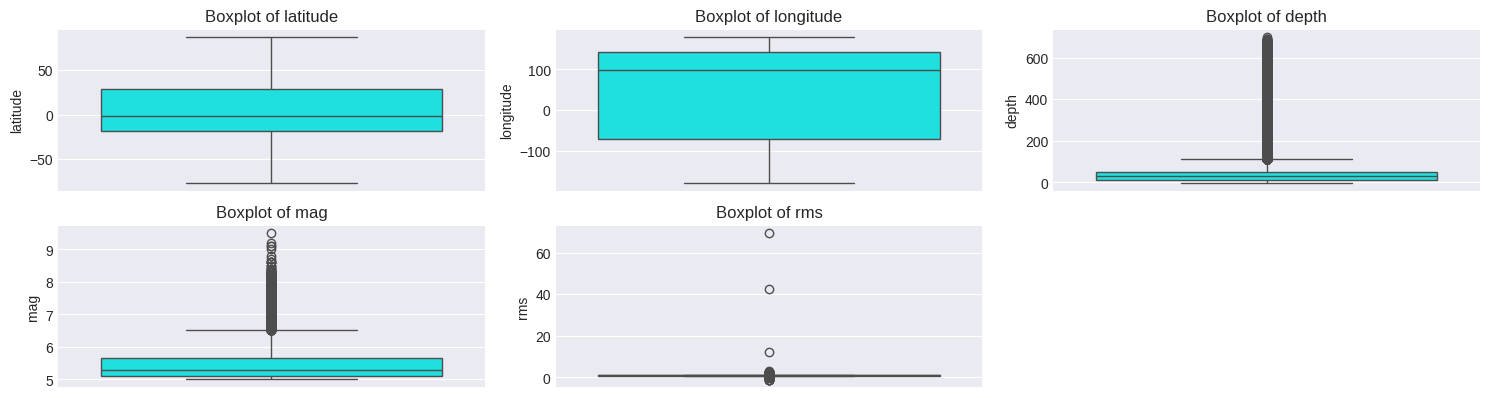

In [73]:
# List of numerical columns to analyze
num_col = ['latitude', 'longitude', 'depth', 'mag', 'rms']


plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

We choose not to remove outliers from the dataset because, in the context of earthquakes, outliers often represent significant or extreme seismic events. These events are crucial for accurate modeling and prediction. These extreme values are not errors; they are real and meaningful data points that reflect the unpredictable nature of natural disasters.

Removing outliers could lead to a loss of important information, especially since our goal is to build a model that can handle and predict rare but impactful events like high-magnitude earthquakes.

IQR Method to Find Outliers

In [74]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Check outliers for each column
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

outlier_counts

# If outliers represent real earthquake behavior, we should keep them


{'latitude': 0,
 'longitude': 0,
 'depth': 12868,
 'mag': 3939,
 'nst': 35276,
 'gap': 45403,
 'dmin': 25799,
 'rms': 12142,
 'horizontalError': 24182,
 'depthError': 10038,
 'magError': 38513,
 'magNst': 45520}

# **Feature Engineering**

Extracting Year and Month From Time

In [75]:
# making new column for month and year
#Convert to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract year and month
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

Extracting Country from place

In [76]:
# Extract the last word in the "place" column
df["country"] = df["place"].str.split(", ").str[-1]

# Display unique country values to check correctness
country_counts = df["country"].value_counts()

# Print each country and its count
for country, count in country_counts.items():
    print(f"{country}: {count}")

Indonesia: 12092
Papua New Guinea: 6475
Japan: 6388
Philippines: 5053
Russia: 4376
Tonga: 4361
Alaska: 3991
Vanuatu: 3467
Chile: 3404
South Sandwich Islands region: 3329
Solomon Islands: 2591
New Zealand: 1884
China: 1737
Mexico: 1735
Peru: 1733
Kermadec Islands region: 1560
Japan region: 1529
south of the Fiji Islands: 1436
Taiwan: 1105
India: 1070
Iran: 1063
Greece: 1043
Fiji: 997
Fiji region: 937
Timor Leste: 866
Argentina: 862
south of the Kermadec Islands: 854
Northern Mariana Islands: 793
New Caledonia: 785
northern Mid-Atlantic Ridge: 767
Turkey: 732
southern Mid-Atlantic Ridge: 715
Guam: 706
southeast of the Loyalty Islands: 690
Pacific-Antarctic Ridge: 674
Kuril Islands: 663
Mid-Indian Ridge: 656
central Mid-Atlantic Ridge: 632
Afghanistan: 609
Colombia: 557
southern East Pacific Rise: 543
Pakistan: 468
Guatemala: 436
Ecuador: 428
Panama: 412
Banda Sea: 372
Nicaragua: 371
Canada: 370
Myanmar: 367
California: 365
west of Macquarie Island: 351
central East Pacific Rise: 329
Mari

In [77]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'locationSource', 'magSource',
       'year', 'month', 'country'],
      dtype='object')

# **Univariate Analysis**

 Histograms –Distribution Plots of Key Features

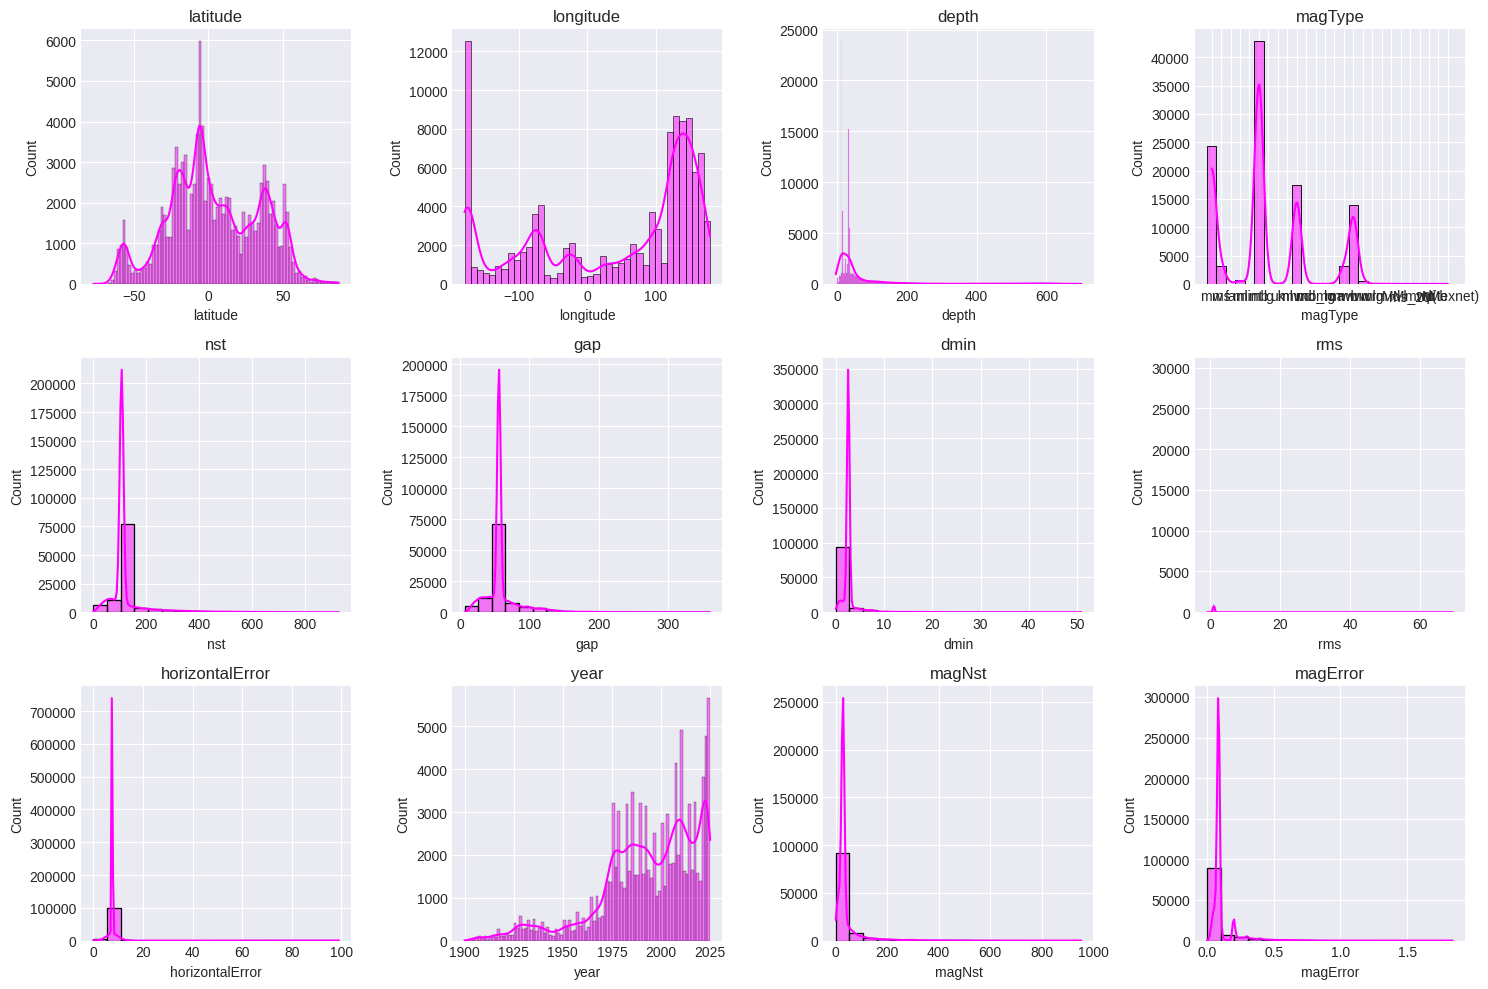

In [78]:
num_col=['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap', 'dmin', 'rms', 'horizontalError','year','magNst','magError']

# Adjust the figsize to accommodate all columns
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # 3 rows, 4 columns

for i, column in enumerate(num_col):
    row, col = divmod(i, 4)  # Calculate row and column index
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col], color='magenta')  # Access axes using row, col
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

Countplot  – Distribution of  Magnitude Types

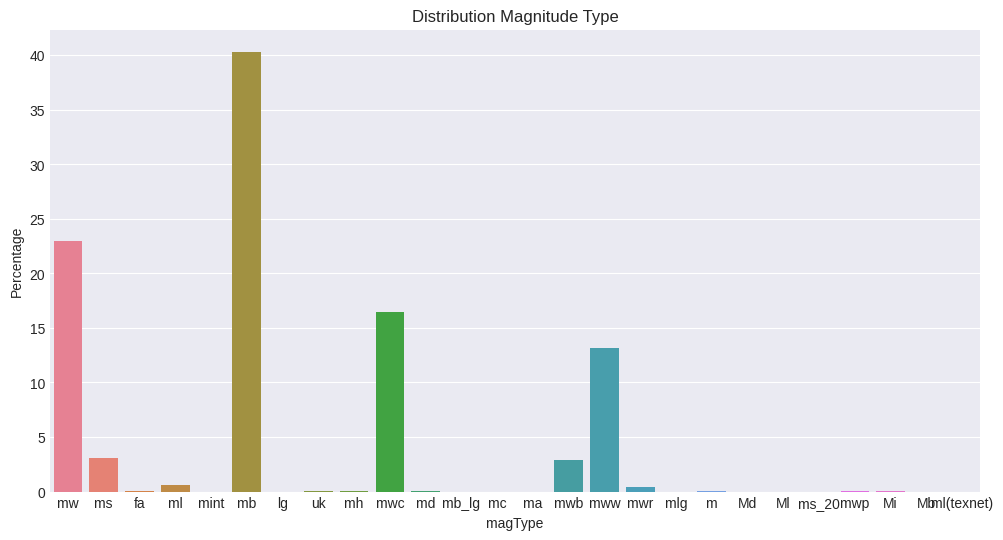

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x="magType", hue="magType", stat="percent")
plt.ylabel('Percentage')
plt.title('Distribution Magnitude Type')
plt.show()

Pie Chart – Earthquakes by Top 10 Countries

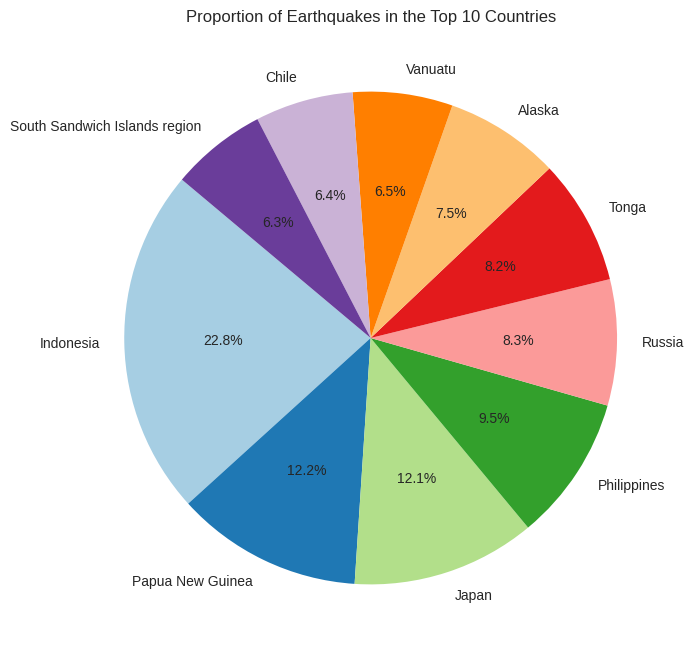

In [80]:
# Select the top 10 countries
top_countries = country_counts.head(10)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proportion of Earthquakes in the Top 10 Countries")
plt.show()

Violin Plot - Earthquake Magnitude Distribution per Country

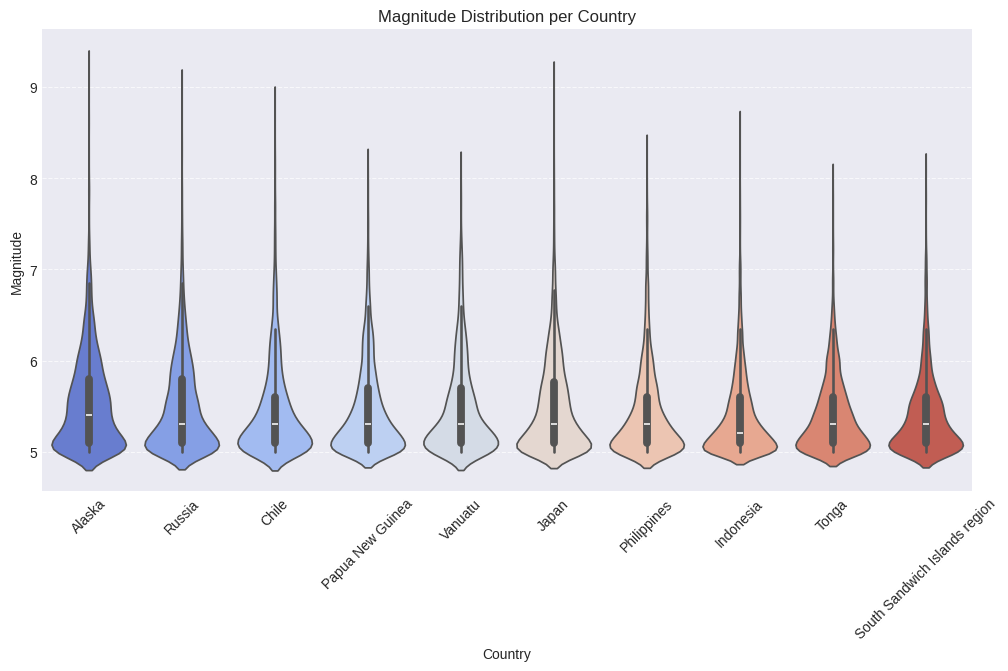

In [81]:
# Select top 10 countries with most earthquakes
top_countries = df['country'].value_counts().nlargest(10).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='mag', data=df_top, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Magnitude")
plt.title("Magnitude Distribution per Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Bivariate Analysis**

 Scatter Plot – Earthquake Magnitude  vs  Depth

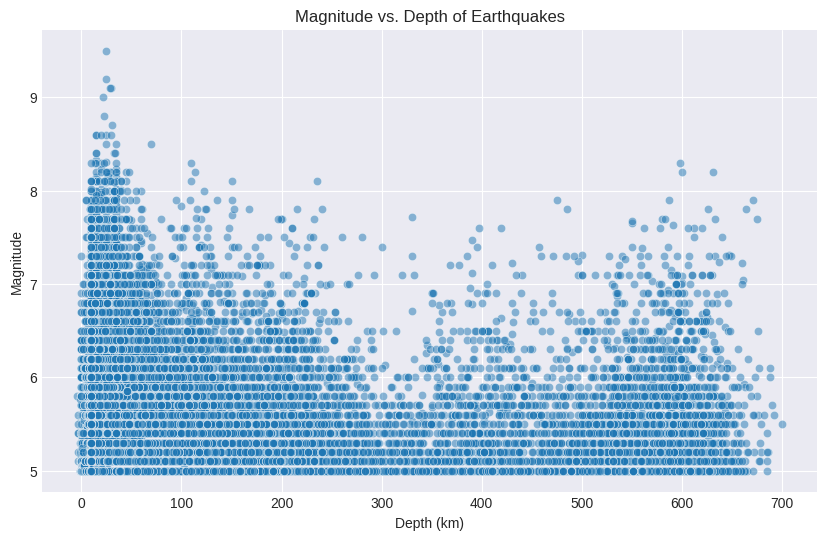

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["depth"], y=df["mag"], alpha=0.5)

plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Depth of Earthquakes")
plt.grid(True)
plt.show()

The majority of earthquakes occur at depths less than 100 km (left side of the graph).

This suggests that shallow earthquakes are more frequent than deeper ones.

Magnitudes (5.0 to 9.0) appear randomly distributed across different depths.

This means that depth does not strongly influence the magnitude of an earthquake.

Both shallow and deep earthquakes can have high or low magnitudes.

 Line Plot – Earthquake Magnitude Trend Over Years

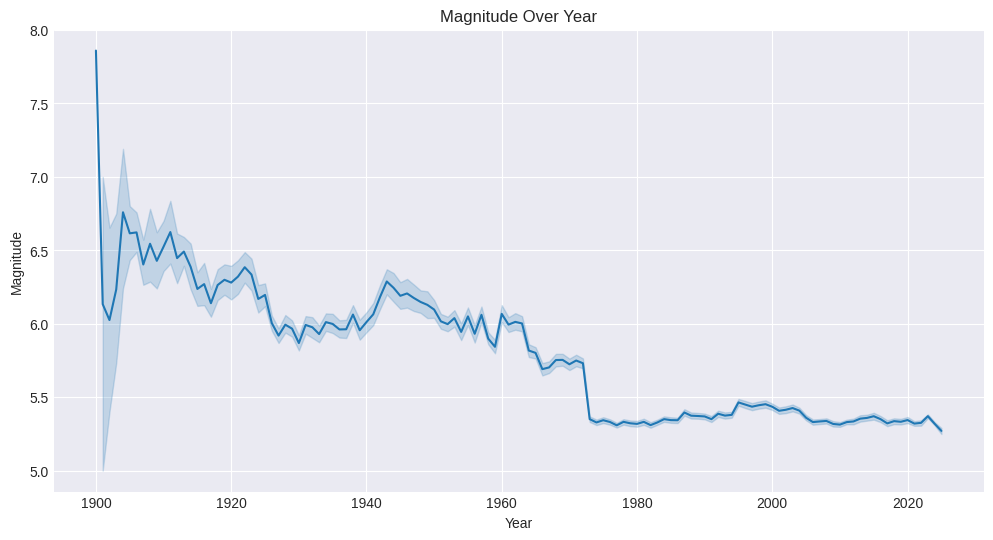

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mag', data=df)
plt.title('Magnitude Over Year')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.show()

 Line Plot – Yearly Trend of Major Earthquakes (Magnitude > 7)

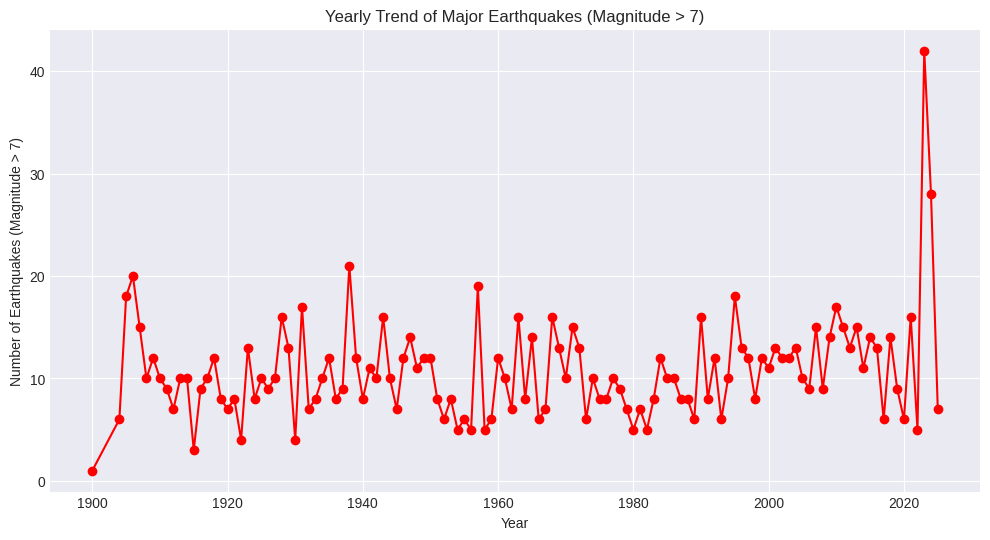

In [84]:
# Filter earthquakes with magnitude greater than 7
df_filtered = df[df['mag'] > 7]

# Count earthquakes per year
yearly_counts = df_filtered.groupby('year')['mag'].count()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='red')
# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes (Magnitude > 7)")
plt.title("Yearly Trend of Major Earthquakes (Magnitude > 7)")
plt.grid(True)
plt.show()

# **Multivariate Analysis**

 Animated World Map – Visualization of Earthquake Events

In [85]:
import plotly.express as px
fig = px.scatter_geo(df, lon='longitude', lat='latitude',size='mag', animation_frame='year', projection='natural earth',title='Earthquake Animation')

fig.update_geos(
  showcoastlines=True, coastlinecolor="Red",
showland=True, landcolor="rgb(200, 200, 200)",
showocean=True, oceancolor="rgb(100, 149, 237)",
showcountries=True, countrycolor="rgb(35, 35, 35)"
)

fig.update_layout(
    height=1000,
    width= 1000
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

 World Map – Global Distribution of Major Earthquakes (1900 to Present)

In [86]:
!pip install cartopy

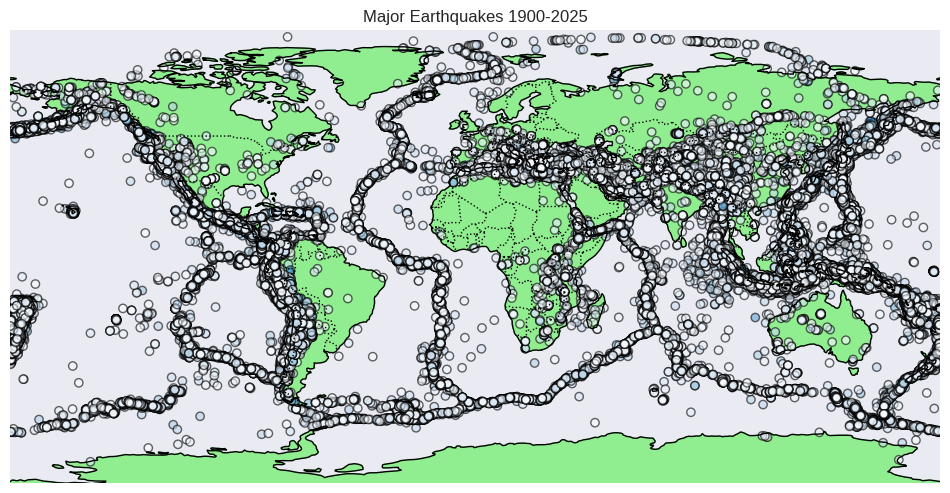

In [87]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature



# Create a figure and add a map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Add features: land, borders, and coastlines
ax.add_feature(cfeature.LAND, color="lightgreen")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE)

# Scatter plot of earthquake locations
sc = ax.scatter(df['longitude'], df['latitude'],
                c=df['mag'], cmap='Blues', alpha=0.6, edgecolors="black",
                transform=ccrs.PlateCarree())

# Add title
ax.set_title("Major Earthquakes 1900-2025")

# Show the plot
plt.show()


 World Map – Earthquake Locations and Magnitude Representation

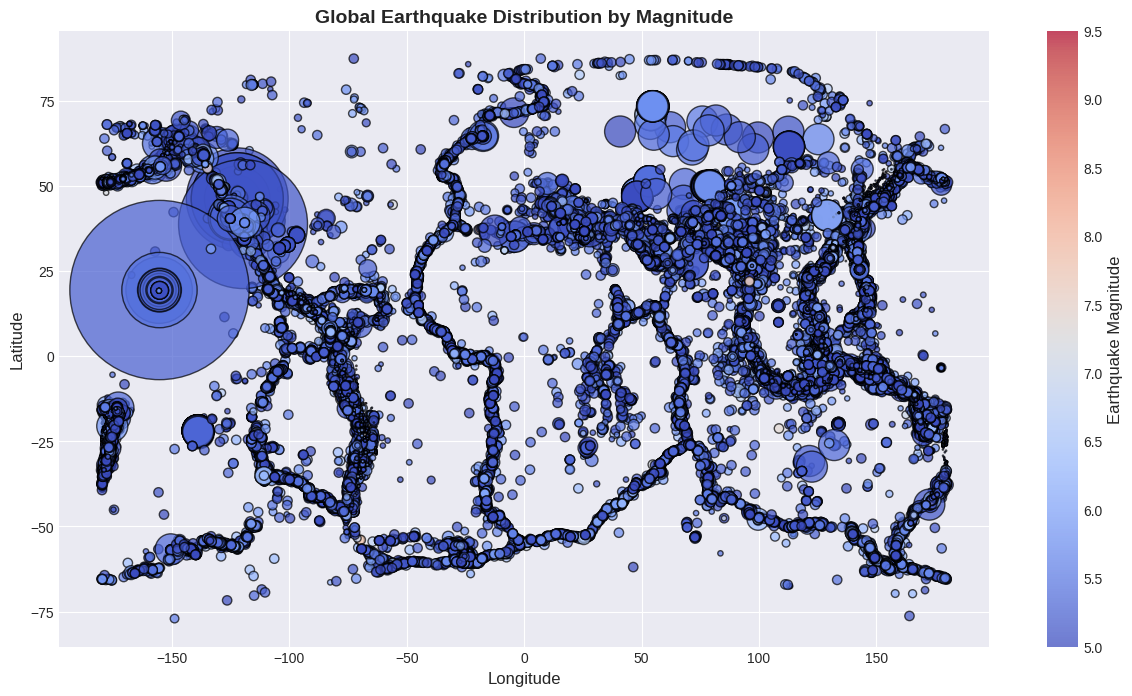

In [88]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

# Define plot size
plt.figure(figsize=(15, 8))

# Plot the scatter map using existing longitude and latitude
scatter = plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['mag'],
    cmap='coolwarm',
    s=(10 / (df['depth'] + 1)) * 50,
    alpha=0.7,
    edgecolors='k'
)

# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label("Earthquake Magnitude", fontsize=12)

plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title("Global Earthquake Distribution by Magnitude", fontsize=14, fontweight="bold")

plt.show()


In [89]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'locationSource', 'magSource',
       'year', 'month', 'country'],
      dtype='object')

Droping Columns which not taking for features

In [90]:
df.drop(columns=['time','magSource','locationSource','depthError','net','place','type'], axis=1, inplace=True)

# **Label Encoding**

In [91]:
le = LabelEncoder()
df['magType'] = le.fit_transform(df['magType'])
df['country'] = le.fit_transform(df['country'])
print(df)

        latitude  longitude    depth   mag  magType    nst    gap   dmin  \
0        57.0900  -153.4800   33.000  7.86       19  107.0   56.0  2.594   
1        36.0000  -120.5000   33.000  6.40       17  107.0   56.0  2.594   
2        40.8000  -115.7000   33.000  5.00        4  107.0   56.0  2.594   
3        52.0000  -160.0000   33.000  7.00       17  107.0   56.0  2.594   
4        52.3800  -167.4500   33.000  7.00       17  107.0   56.0  2.594   
...          ...        ...      ...   ...      ...    ...    ...    ...   
106080  -10.2343    66.0620   10.000  5.30       24   98.0   42.0  9.816   
106081  -29.5291  -177.2317   36.783  5.20        8   75.0  111.0  0.657   
106082   13.4753   145.5991   65.557  5.30       24  113.0   57.0  0.720   
106083   -5.9760   130.6442  126.000  5.50       24   84.0   20.0  1.621   
106084   18.2972   -99.3687   65.162  5.00       24  215.0   52.0  1.039   

            rms  horizontalError  magError  magNst  year  month  country  
0       0.95

**features and target Selection**

In [92]:
# Select relevant columns
features = ['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap','magError','dmin', 'rms', 'horizontalError', 'magNst', 'year']
target = 'mag'

In [93]:
# Features and target
X = df[features]
y = df[target]

Heatmap – Correlation Among Earthquake Features

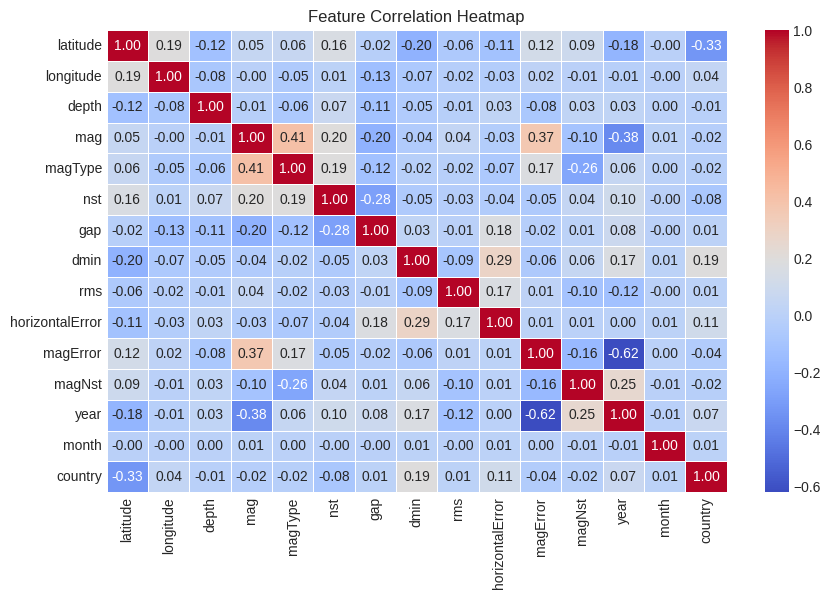

In [94]:
# Calculate the correlation matrix only for numerical features
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Standard Scaling**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X.head()

,latitude,longitude,depth,magType,nst,gap,magError,dmin,rms,horizontalError,magNst,year
0,57.09,-153.48,33.0,19,107.0,56.0,0.086,2.594,0.95267,7.6,28.0,1900
1,36.00,-120.50,33.0,17,107.0,56.0,0.086,2.594,0.95267,7.6,28.0,1901
2,40.80,-115.70,33.0,4,107.0,56.0,0.086,2.594,0.95267,7.6,28.0,1901
3,52.00,-160.00,33.0,17,107.0,56.0,0.086,2.594,0.95267,7.6,28.0,1901
4,52.38,-167.45,33.0,17,107.0,56.0,0.086,2.594,0.95267,7.6,28.0,1902


In [97]:
y.head()

,mag
0,7.86
1,6.40
2,5.00
3,7.00
4,7.00


In [98]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Model Selection**

# **Linear Regression**

In [99]:

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


In [100]:
print("r2 of linear regression",r2_lr)
print("mse of linear regression",mse_lr)
print("rmse of linear regression",rmse_lr)


r2 of linear regression 0.39312848204773077
mse of linear regression 0.1439736541361637
rmse of linear regression 0.3794386039086741


# **SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred_svm = svr.predict(X_test)

r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print("r2 of linear regression",r2_svm)
print("mse of linear regression",mse_svm)
print("rmse of linear regression",rmse_svm)


# **Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Train the model
dt= DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluation
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)



In [ ]:
print("r2 of Decison Tree",r2_dt)
print("mse of Decision Tree",mse_dt)
print("rmse of Decision Tree",rmse_dt)


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf= rf.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("r2 of Decison Tree",r2_rf)
print("mse of Decision Tree",mse_rf)
print("rmse of Decision Tree",rmse_rf)

# **Hyper Tunning Random Forest**

In [ ]:
# Select relevant columns
X = df[['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap',
        'dmin', 'rms', 'horizontalError','year','magNst','magError']]
y = df['mag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_ht=RandomForestRegressor(
    n_estimators=1500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_ht.fit(X_train,y_train)

In [ ]:
y_pred_rfht = rf_ht.predict(X_test)

# Evaluation
r2_rfht = r2_score(y_test, y_pred_rfht)
mse_rfht = mean_squared_error(y_test, y_pred_rfht)
rmse_rfht = np.sqrt(mse_rfht)

print("r2 of Decison Tree",r2_rfht)
print("mse of Decision Tree",mse_rfht)
print("rmse of Decision Tree",rmse_rfht)

Regression Model results

In [ ]:
regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM',"Random Forest Hyper Tuned" ],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_svm, r2_rfht],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svm, mse_rfht],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_svm, rmse_rfht]
})

print(regression_results)


Based on these results, the Random Forest models, especially the hyperparameter-tuned version, appear to be the most suitable for predicting the target variable in your dataset

In [ ]:
import pickle

# Save trained RandomForestRegressor model
with open('earthquake_model.pkl', 'wb') as f:
    pickle.dump(rf_ht, f)
# Comprsesing the model
import joblib
joblib.dump(rf_ht, 'earthquake_model.pkl', compress=3)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('magType_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)